# Boosting

Бустинг — это еще один способ ансамблирования моделей. В отличие от случайного леса, где каждая модель в ансамбле строится независимо, в бустинге построение очередной модели зависит от уже состоящих в ансамбле моделей. Каждая следующая модель в ансамбле стремится улучшить предсказание всего ансамбля.

Бустинг позволяет нам на основе большого числа "слабых" моделей получить одну "сильную". Под слабыми моделями подразумеваем модели, точность которых может быть лишь немногим выше случайного угадывания.

В качестве моделей традиционно используются деревья решений, но не большой глубины, а наоборот — маленькой, чтобы каждое из них не могло выучить выборку хорошо.








<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/join_weak_learners.png" width="650"/></center>

Из всех бустингов больше всего прославился и доказал свою эффективность **градиентный бустинг**. Он позволяет получить решение, которое сложно побить другими видами моделей.



## Gradient boosting (градиентный бустинг)

Начнем с интуиции. Предположим, что мы играем в гольф. Наша задача — загнать мячик в лунку, причем, когда мячик далеко от нее, мы можем ударить посильнее, чтобы сократить расстояние, но когда мы уже близко к лунке, то стараемся бить клюшкой аккуратнее, чтобы не промахнуться. После каждого удара мы оцениваем расстояние до лунки и приближаем мячик в ее сторону. Применительно к нашей теме, удар клюшкой по мячику — это каждая модель в градиентном бустинге.



<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/summarize_predictions_of_ensemble_models.png" width="650"/></center>

Цель $i$-той модели в ансамбле — скорректировать ошибки предыдущих ${i-1}$ моделей. В результате, когда мы суммируем вклады всех моделей ансамбля, получается хорошее предсказание.

Давайте формализуем, что нам нужно, чтобы обучить алгоритм градиентного бустинга:

- набор данных $\left\{\left(x_i, y_i\right)\right\}_{i=1, \ldots, n}$,
- число итераций $M$ (оно же количество моделей),
- выбор дифференцируемой функции потерь $L(y, f)$,
- выбор семейства функций базовых алгоритмов $h(x, \theta)$ с процедурой их обучения.

Минимизировать ошибку будем с помощью градиентного спуска.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/gradient_boosting.png" width="600"/></center>

Разберем пошагово.

Начинаем с первого предсказания. Можем выбрать на самом деле любое число, например, среднее значение:

$$ \large \hat{f}(x)=\hat{f}_0, \hat{f}_0=\gamma, \gamma \in \mathbb{R}
 \tag{1}$$

Либо подобрать с наименьшей ошибкой:

$$\large \hat{f}_0=\underset{\gamma}{\arg \min } \sum_{i=1}^n L\left(y_i, \gamma\right) $$

Посмотрим на графике, как бы могла выглядеть наша зависимость. Посчитаем ошибку и отобразим наше предсказание.



<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/gb_explanation_step1.png" width="700"/></center>

В нашем примере мы видим, что нужно двигаться вправо, чтобы уменьшить ошибку. В действительности мы этого не знаем, но можем посчитать градиент и узнать направление возрастания функции ошибки. Нас же интересует обратное направление или градиент со знаком минус (антиградиент).

$$\large r_{i t}=-\frac{\partial L\left(y_i, f\left(x_i\right)\right)}{\partial f\left(x_i\right)} \quad \tag{2}$$

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/gb_explanation_step2.png" width="700"/></center>

Строим новый базовый алгоритм $h_t(x)$, который обучается на то, чтобы уменьшить ошибку от текущего состояния ансамбля, и в качестве целевой переменной для него берем антиградиент функции потерь  $\left\{\left(x_i, r_{i t}\right)\right\}_{i=1, \ldots, n}$

$$\large h_t(x) = \underset{\theta}{\arg \min } \sum_{i=1}^n L\left(h(x_i, \theta), r_{it}\right) \tag{3}$$

Подбираем оптимальный параметр $\large \rho$. Этот параметр будет разным у каждого дерева в нашем ансамбле, в отличие от learning rate:

 $$\large \rho_t=\underset{\rho}{\arg \min } \sum_{i=1}^n L\left(y_i, \hat{f}\left(x_i\right)+\rho \cdot h_t\left(x_i, \theta\right)\right) \tag{4}$$

Сдвигаем предсказание в сторону уменьшения ошибки, где $\lambda$ — это learning rate:

 $$\large \hat{f}_t(x)= \lambda \cdot \rho_t \cdot h_t(x) \tag{5}$$

Обновляем текущее приближение $\hat{f}(x)$:
$$ \large
\hat{f}(x) \leftarrow \hat{f}(x)+\hat{f}_t(x)=\sum_{i=0}^t \hat{f}_i(x) \tag{6}
$$

Далее повторяем шаги 2–6, пока не получим требуемое качество, и собираем итоговый ансамбль $\hat{f}(x)$:

$$
\large
\hat{f}(x)=\sum_{i=0}^M \hat{f}_i(x)
$$


Когда мы говорили про базовые модели, то предполагали, что это деревья решений. Но это необязательно, можно использовать и другие алгоритмы в качестве базовых моделей.

Деревья решений имеют ряд преимуществ:

- Гибкость — деревья решений могут описывать сложные нелинейные взаимосвязи между объектами и целевой переменной. Они могут обрабатывать как числовые, так и категориальные данные и работать с пропущенными значениями.

- Интерпретируемость — деревья решений просты в понимании и интерпретации. Они дают четкое представление о том, как модель пришла к определенному прогнозу.

- Устойчивость к выбросам — деревья решений менее чувствительны к выбросам, чем другие алгоритмы машинного обучения. Они способны изолировать их и предотвратить их влияние на всю модель.

- Эффективность — деревья решений могут быть построены быстро, они способны обрабатывать большие наборы данных.

### Интуиция принципа работы градиентного бустинга

Рассмотрим "игрушечный" пример того, как работает и обучается градиентный бустинг.

В данной демонстрации мы допускаем упрощения в угоду понятности и интуитивности. Первоочередная цель — это дать ответы на вопросы:
* Как пошагово обучается градиентный бустинг?
* Что получают на вход модели в градиентном бустинге?
* Что предсказывают модели в градиентном бустинге?
* Где градиент в градиентном бустинге?


Будем решать задачу регрессии. Для начала сгенерируем датасет: создадим 10 объектов с 3 признаками и целевой переменной.

In [1]:
import numpy as np
from sklearn.datasets import make_regression

np.random.seed(0)
x, y = make_regression(n_samples=10, n_features=3)

In [2]:
print(f"x.shape: {x.shape}\nx:\n {x}")

x.shape: (10, 3)
x:
 [[ 1.49407907 -0.20515826  0.33367433]
 [ 0.40015721  0.97873798  1.76405235]
 [ 0.12167502  0.44386323  0.76103773]
 [-0.15135721 -0.10321885  0.95008842]
 [ 0.14404357  1.45427351  0.4105985 ]
 [-0.85409574 -2.55298982  0.3130677 ]
 [ 0.8644362  -0.74216502  0.6536186 ]
 [ 1.53277921  1.46935877 -0.18718385]
 [ 1.86755799 -0.97727788  2.2408932 ]
 [-1.45436567  0.04575852  2.26975462]]


In [3]:
print(f"y.shape: {y.shape}\ny:\n {y}")

y.shape: (10,)
y:
 [ 125.98419292  228.95203573   96.07607259   75.63377087  100.85361934
 -120.47027794   93.94272528  139.66716702  303.68384795  116.69110743]


Отобразим данные в `DataFrame` для наглядности:

In [4]:
import pandas as pd

df = pd.DataFrame(x, columns=["feature_1", "feature_2", "feature_3"])
df["y_true"] = y

In [5]:
df

,feature_1,feature_2,feature_3,y_true
0,1.494079,-0.205158,0.333674,125.984193
1,0.400157,0.978738,1.764052,228.952036
2,0.121675,0.443863,0.761038,96.076073
3,-0.151357,-0.103219,0.950088,75.633771
4,0.144044,1.454274,0.410599,100.853619
5,-0.854096,-2.552990,0.313068,-120.470278
6,0.864436,-0.742165,0.653619,93.942725
7,1.532779,1.469359,-0.187184,139.667167
8,1.867558,-0.977278,2.240893,303.683848
9,-1.454366,0.045759,2.269755,116.691107


**Шаг 0.**

Делаем самое первое предсказание, от которого сможем шагать дальше. Самое наивное, что можно сделать, — это предсказать среднее:

In [6]:
df["y_pred_0"] = df["y_true"].mean()

In [7]:
df

,feature_1,feature_2,feature_3,y_true,y_pred_0
0,1.494079,-0.205158,0.333674,125.984193,116.101426
1,0.400157,0.978738,1.764052,228.952036,116.101426
2,0.121675,0.443863,0.761038,96.076073,116.101426
3,-0.151357,-0.103219,0.950088,75.633771,116.101426
4,0.144044,1.454274,0.410599,100.853619,116.101426
5,-0.854096,-2.552990,0.313068,-120.470278,116.101426
6,0.864436,-0.742165,0.653619,93.942725,116.101426
7,1.532779,1.469359,-0.187184,139.667167,116.101426
8,1.867558,-0.977278,2.240893,303.683848,116.101426
9,-1.454366,0.045759,2.269755,116.691107,116.101426


Теперь посчитаем ошибку по всем объектам, будем использовать mean squared error:

 $\large \text{MSE} = \dfrac1n \sum\limits_{i=1}^{n}(x_i-y_i)^2$

In [8]:
from sklearn.metrics import mean_squared_error

mse_0 = mean_squared_error(df["y_true"], df["y_pred_0"])

print(f"Iteration №0, mse: {mse_0}")

Iteration №0, mse: 10730.410671822861


**Шаг 1.**

Посчитаем градиент со знаком минус (антиградиент):

In [9]:
df["-grad_0"] = -2*(df["y_pred_0"] - df["y_true"])

In [10]:
df

,feature_1,feature_2,feature_3,y_true,y_pred_0,-grad_0
0,1.494079,-0.205158,0.333674,125.984193,116.101426,19.765534
1,0.400157,0.978738,1.764052,228.952036,116.101426,225.701219
2,0.121675,0.443863,0.761038,96.076073,116.101426,-40.050707
3,-0.151357,-0.103219,0.950088,75.633771,116.101426,-80.935310
4,0.144044,1.454274,0.410599,100.853619,116.101426,-30.495614
5,-0.854096,-2.552990,0.313068,-120.470278,116.101426,-473.143408
6,0.864436,-0.742165,0.653619,93.942725,116.101426,-44.317402
7,1.532779,1.469359,-0.187184,139.667167,116.101426,47.131482
8,1.867558,-0.977278,2.240893,303.683848,116.101426,375.164844
9,-1.454366,0.045759,2.269755,116.691107,116.101426,1.179363


**Шаг 2.**

Создадим простой предсказатель (возьмем дерево глубиной, равной единице). Обучим дерево восстанавливать антиградиент. Входные данные — наши признаки, целевая переменная — антиградиент.

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(max_depth=1)

tree_1.fit(df[["feature_1", "feature_2", "feature_3"]], df["-grad_0"])

DecisionTreeRegressor(max_depth=1)

Делаем предсказание нашего дерева:

In [12]:
df["tree_pred_1"] = tree_1.predict(df[["feature_1", "feature_2", "feature_3"]])

In [13]:
df

,feature_1,feature_2,feature_3,y_true,y_pred_0,-grad_0,tree_pred_1
0,1.494079,-0.205158,0.333674,125.984193,116.101426,19.765534,52.571490
1,0.400157,0.978738,1.764052,228.952036,116.101426,225.701219,52.571490
2,0.121675,0.443863,0.761038,96.076073,116.101426,-40.050707,52.571490
3,-0.151357,-0.103219,0.950088,75.633771,116.101426,-80.935310,52.571490
4,0.144044,1.454274,0.410599,100.853619,116.101426,-30.495614,52.571490
5,-0.854096,-2.552990,0.313068,-120.470278,116.101426,-473.143408,-473.143408
6,0.864436,-0.742165,0.653619,93.942725,116.101426,-44.317402,52.571490
7,1.532779,1.469359,-0.187184,139.667167,116.101426,47.131482,52.571490
8,1.867558,-0.977278,2.240893,303.683848,116.101426,375.164844,52.571490
9,-1.454366,0.045759,2.269755,116.691107,116.101426,1.179363,52.571490


Посмотрим подробнее, по какому правилу дерево делает предсказание:

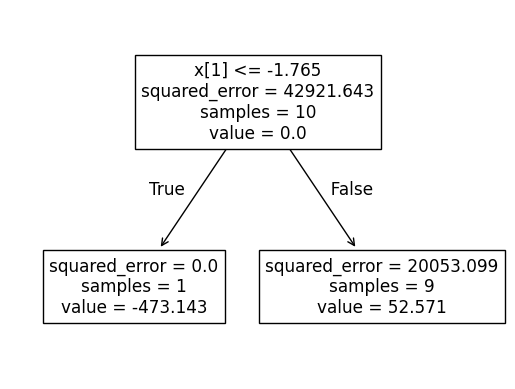

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(tree_1)
plt.show()

**Шаг 3.**

Делаем шаг к искомой целевой переменной. Умножаем предсказание дерева на шаг (`learning rate = lr`) и прибавляем к предыдущему прогнозу.

In [15]:
lr = 0.1

df["y_pred_1"] = df["y_pred_0"] + lr*df["tree_pred_1"]

In [16]:
df

,feature_1,feature_2,feature_3,y_true,y_pred_0,-grad_0,tree_pred_1,y_pred_1
0,1.494079,-0.205158,0.333674,125.984193,116.101426,19.765534,52.571490,121.358575
1,0.400157,0.978738,1.764052,228.952036,116.101426,225.701219,52.571490,121.358575
2,0.121675,0.443863,0.761038,96.076073,116.101426,-40.050707,52.571490,121.358575
3,-0.151357,-0.103219,0.950088,75.633771,116.101426,-80.935310,52.571490,121.358575
4,0.144044,1.454274,0.410599,100.853619,116.101426,-30.495614,52.571490,121.358575
5,-0.854096,-2.552990,0.313068,-120.470278,116.101426,-473.143408,-473.143408,68.787085
6,0.864436,-0.742165,0.653619,93.942725,116.101426,-44.317402,52.571490,121.358575
7,1.532779,1.469359,-0.187184,139.667167,116.101426,47.131482,52.571490,121.358575
8,1.867558,-0.977278,2.240893,303.683848,116.101426,375.164844,52.571490,121.358575
9,-1.454366,0.045759,2.269755,116.691107,116.101426,1.179363,52.571490,121.358575


Видно, что для каких-то объектов стало лучше, для каких-то — хуже. Сравним общее качество после первой итерации:

In [17]:
mse_0 = mean_squared_error(df["y_true"], df["y_pred_0"])
mse_1 = mean_squared_error(df["y_true"], df["y_pred_1"])

print(f"Iteration №0, mse: {mse_0}")
print(f"Iteration №1, mse: {mse_1}")

Iteration №0, mse: 10730.410671822861
Iteration №1, mse: 8491.763825337976


Отлично, стало лучше! Повторим шаги с 1 по 3.

**Шаг 1.**

Считаем антиградиент от последнего предсказания `y_pred_1`:

In [18]:
df["-grad_1"] = -2*(df["y_pred_1"] - df["y_true"])

In [19]:
df

,feature_1,feature_2,feature_3,y_true,y_pred_0,-grad_0,tree_pred_1,y_pred_1,-grad_1
0,1.494079,-0.205158,0.333674,125.984193,116.101426,19.765534,52.571490,121.358575,9.251236
1,0.400157,0.978738,1.764052,228.952036,116.101426,225.701219,52.571490,121.358575,215.186921
2,0.121675,0.443863,0.761038,96.076073,116.101426,-40.050707,52.571490,121.358575,-50.565005
3,-0.151357,-0.103219,0.950088,75.633771,116.101426,-80.935310,52.571490,121.358575,-91.449608
4,0.144044,1.454274,0.410599,100.853619,116.101426,-30.495614,52.571490,121.358575,-41.009912
5,-0.854096,-2.552990,0.313068,-120.470278,116.101426,-473.143408,-473.143408,68.787085,-378.514726
6,0.864436,-0.742165,0.653619,93.942725,116.101426,-44.317402,52.571490,121.358575,-54.831700
7,1.532779,1.469359,-0.187184,139.667167,116.101426,47.131482,52.571490,121.358575,36.617184
8,1.867558,-0.977278,2.240893,303.683848,116.101426,375.164844,52.571490,121.358575,364.650546
9,-1.454366,0.045759,2.269755,116.691107,116.101426,1.179363,52.571490,121.358575,-9.334935


**Шаг 2.**

Создаем второе дерево, учим на новом антиградиенте:

In [20]:
tree_2 = DecisionTreeRegressor(max_depth=1)

tree_2.fit(df[["feature_1", "feature_2", "feature_3"]], df["-grad_1"])

DecisionTreeRegressor(max_depth=1)

**Шаг 3.**

Шагаем в сторону антиградиента:

In [21]:
df["y_pred_2"] = df["y_pred_1"] + lr * tree_2.predict(df[["feature_1", "feature_2", "feature_3"]])

In [22]:
df

,feature_1,feature_2,feature_3,y_true,y_pred_0,-grad_0,tree_pred_1,y_pred_1,-grad_1,y_pred_2
0,1.494079,-0.205158,0.333674,125.984193,116.101426,19.765534,52.571490,121.358575,9.251236,125.564294
1,0.400157,0.978738,1.764052,228.952036,116.101426,225.701219,52.571490,121.358575,215.186921,125.564294
2,0.121675,0.443863,0.761038,96.076073,116.101426,-40.050707,52.571490,121.358575,-50.565005,125.564294
3,-0.151357,-0.103219,0.950088,75.633771,116.101426,-80.935310,52.571490,121.358575,-91.449608,125.564294
4,0.144044,1.454274,0.410599,100.853619,116.101426,-30.495614,52.571490,121.358575,-41.009912,125.564294
5,-0.854096,-2.552990,0.313068,-120.470278,116.101426,-473.143408,-473.143408,68.787085,-378.514726,30.935613
6,0.864436,-0.742165,0.653619,93.942725,116.101426,-44.317402,52.571490,121.358575,-54.831700,125.564294
7,1.532779,1.469359,-0.187184,139.667167,116.101426,47.131482,52.571490,121.358575,36.617184,125.564294
8,1.867558,-0.977278,2.240893,303.683848,116.101426,375.164844,52.571490,121.358575,364.650546,125.564294
9,-1.454366,0.045759,2.269755,116.691107,116.101426,1.179363,52.571490,121.358575,-9.334935,125.564294


Сравним качество на всех итерациях:

In [23]:
mse_1 = mean_squared_error(df["y_true"], df["y_pred_1"])
mse_2 = mean_squared_error(df["y_true"], df["y_pred_2"])

print(f"Iteration №0, mse: {mse_0}")
print(f"Iteration №1, mse: {mse_1}")
print(f"Iteration №2, mse: {mse_2}")

Iteration №0, mse: 10730.410671822861
Iteration №1, mse: 8491.763825337976
Iteration №2, mse: 7059.029843587648


Видим, что качество предсказания улучшается. Напишем цикл, чтобы можно было выбрать большее количество итераций:

In [24]:
df = df[["feature_1", "feature_2", "feature_3", "y_true"]].copy()

In [25]:
df

,feature_1,feature_2,feature_3,y_true
0,1.494079,-0.205158,0.333674,125.984193
1,0.400157,0.978738,1.764052,228.952036
2,0.121675,0.443863,0.761038,96.076073
3,-0.151357,-0.103219,0.950088,75.633771
4,0.144044,1.454274,0.410599,100.853619
5,-0.854096,-2.552990,0.313068,-120.470278
6,0.864436,-0.742165,0.653619,93.942725
7,1.532779,1.469359,-0.187184,139.667167
8,1.867558,-0.977278,2.240893,303.683848
9,-1.454366,0.045759,2.269755,116.691107


In [26]:
n_estimators = 100
lr = 0.1
plot_err = []

# step 0
df["y_pred"] = df["y_true"].mean()

for i in range(n_estimators):
    # step 1
    df["-grad"] = -2*(df["y_pred"] - df["y_true"])
    # step 2
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[["feature_1", "feature_2", "feature_3"]], df["-grad"])
    # step 3
    df["y_pred"] =  df["y_pred"] + lr*tree.predict(df[["feature_1", "feature_2", "feature_3"]])

    if i % (n_estimators / 10) == 0:
        mse = mean_squared_error(df["y_true"], df["y_pred"])
        print(f"Iteration №{i}, mse: {mse}")
    plot_err.append(mean_squared_error(df["y_true"], df["y_pred"]))


Iteration №0, mse: 8491.763825337976
Iteration №10, mse: 1403.2691783734049
Iteration №20, mse: 364.6348996728867
Iteration №30, mse: 144.0501552812308
Iteration №40, mse: 75.39820224483393
Iteration №50, mse: 47.16166782475665
Iteration №60, mse: 33.11280091613624
Iteration №70, mse: 23.787564570277084
Iteration №80, mse: 17.492936757257112
Iteration №90, mse: 13.183725635079167


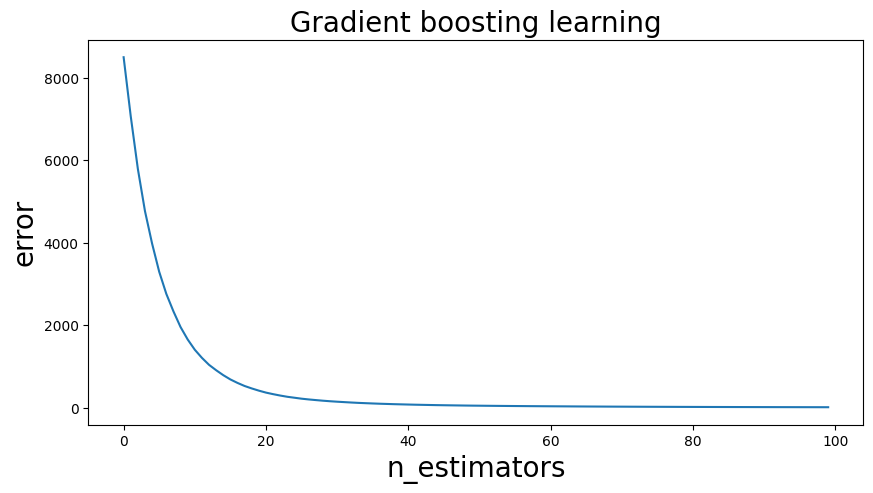

In [27]:
plt.figure(figsize=(10, 5))
plt.title("Gradient boosting learning", fontsize=20)
plt.plot(plot_err)
plt.ylabel("error", fontsize=20)
plt.xlabel("n_estimators", fontsize=20)
plt.show()


[[blog] ✏️ Подробнее о градиентном бустинге](https://habr.com/ru/company/ods/blog/327250/)



[[demo] 🎮 Gradient Boosting explained](https://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)

[[demo] 🎮 Gradient Boosting Interactive Playground](https://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html)

### Предсказание цен домов в Калифорнии с помощью градиентного бустинга

Запустим градиентный бустинг без подбора параметров:

In [28]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

calif_housing = sklearn.datasets.fetch_california_housing(as_frame=True)
x = calif_housing["data"].values
y = calif_housing["target"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

И напишем функцию, которая будет автоматически обучать переданные ей модели и считать для них качество на тесте, чтобы избавиться от необходимости копировать код между ячейками:

In [29]:
from sklearn.utils import resample
import numpy as np

def bootstrap_metric(x, y, metric_fn, samples_cnt=1000, random_state=42):
    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)

    for sample in range(samples_cnt):
        x_boot, y_boot = resample(x, y, replace=True, n_samples=x.shape[0])
        b_metric[sample] = metric_fn(x_boot, y_boot)

    return b_metric

In [30]:
from sklearn.metrics import mean_squared_error
import pandas as pd

def train_and_test_regressor(models, x_train, y_train, x_test, y_test, verb=True):
    boot_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)  # train the model
        y_pred = model.predict(x_test)  # get predictions
        # calculate bootstrap score
        boot_scores[name] = bootstrap_metric(
            y_test,
            y_pred,
            metric_fn=mean_squared_error,
        )
        if verb:
            print(f"Fitted {name} with bootstrap score {boot_scores[name].mean():.3f}")

    results = pd.DataFrame(boot_scores)

    return results

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

models = {}

models["DT"] = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=10,
)

models["RF"] = RandomForestRegressor(
    n_estimators=250,  # for better result set to 1000
    max_depth=None,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
)

models["GradientBoosting"] = GradientBoostingRegressor(
    learning_rate=0.1,  # for better result set to 0.05
    n_estimators=250,  # for better result set to 1000
    random_state=42,
)

results_boost = train_and_test_regressor(models, x_train, y_train, x_test, y_test)

Fitted DT with bootstrap score 0.395
Fitted RF with bootstrap score 0.252
Fitted GradientBoosting with bootstrap score 0.252


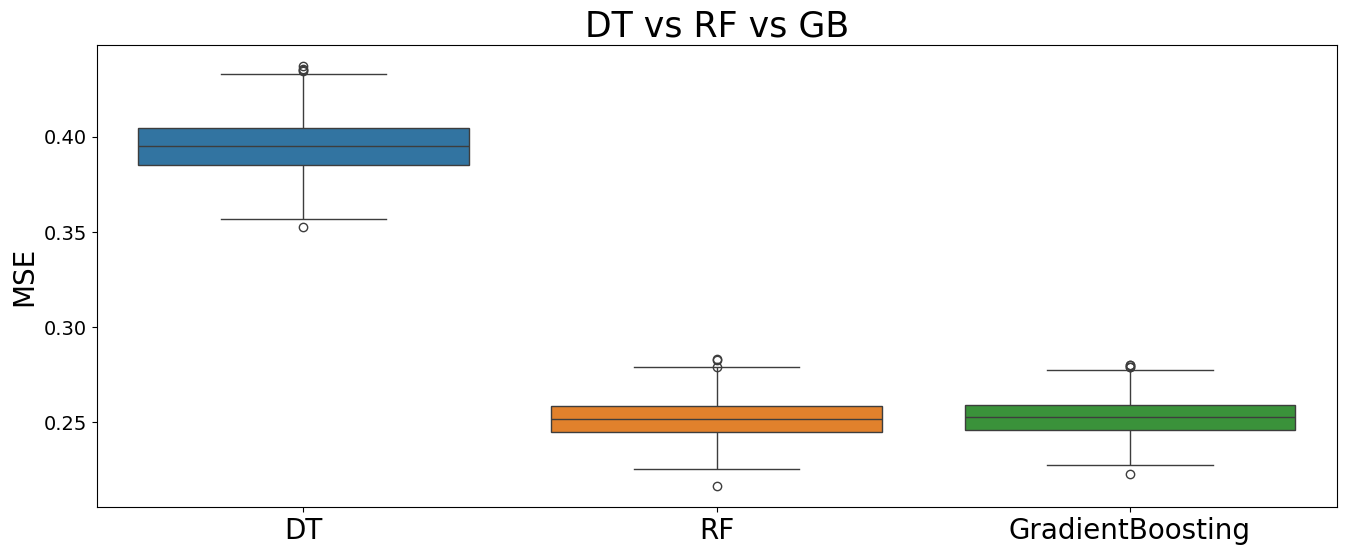

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=results_boost)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("DT vs RF vs GB", size=25)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

Видим, что бустинг сразу дает хороший результат.

### Подбор гиперпараметров градиентного бустинга

**Gradient boosting**, в отличие от случайного леса, может сильно переобучиться. Это важно понимать. Для небольших датасетов часто может оказаться, что случайный лес дает более надежные результаты.

In [33]:
gbtree = GradientBoostingRegressor(
    n_estimators=300, learning_rate=1.0  # faster learning rate to force ovefitting
)
gbtree.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, n_estimators=300)

Используем метод `staged_predict`, который есть во многих реализациях бустинга в том или ином виде. Он получает предсказание от первых $i$ деревьев ансамбля, что позволяет быстро строить график качества градиентного бустинга в зависимости от числа базовых моделей:

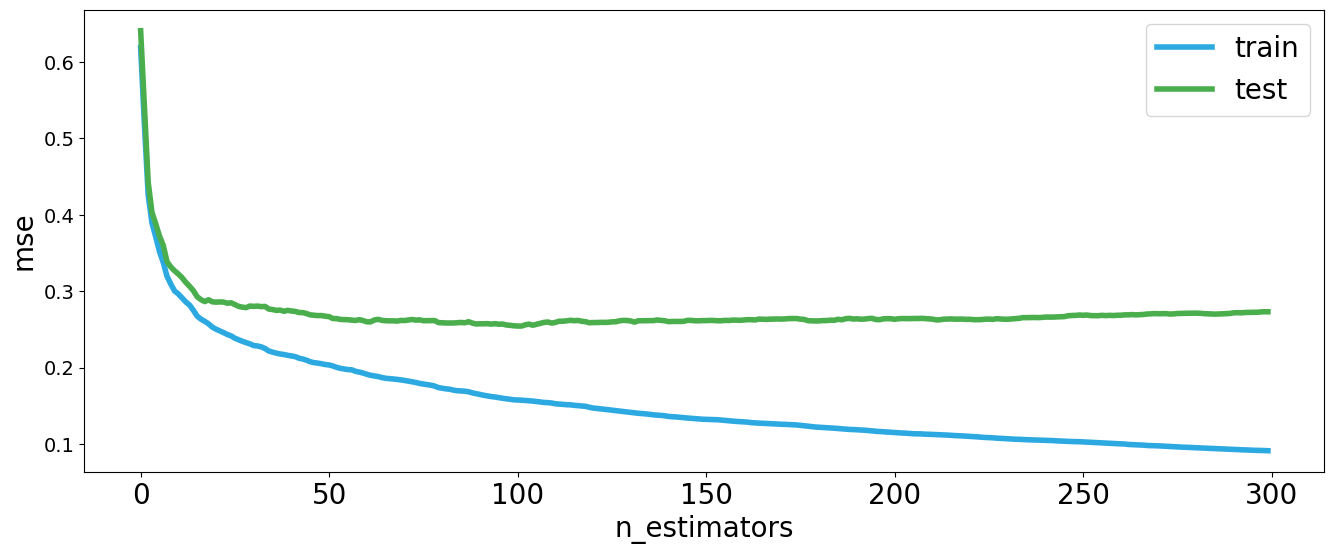

In [34]:
error_train = []
error_test = []
for it, (y_train_pred, y_test_pred) in enumerate(
    zip(gbtree.staged_predict(x_train), gbtree.staged_predict(x_test))
):
    ertr = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    error_train.append(ertr)
    erte = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
    error_test.append(erte)


plt.figure(figsize=(16, 6))
plt.plot(error_train, label="train", c="#2DA9E1", linewidth=4)
plt.plot(error_test, label="test", c="#4AAE4D", linewidth=4)
plt.xlabel("n_estimators", size=20)
plt.ylabel("mse", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

Здесь мы *немного* схитрили, сильно увеличив learning rate нашей модели — дополнительный множитель к весу, с которым добавляются в нее новые модели. Из-за этого даже на таком простом датасете мы в состоянии увидеть явное переобучение.

Давайте об этом learning rate и поговорим.

#### Shrinkage (learning rate)

Мы не хотим сильно скакать по пространству решений, мы хотим спускаться медленно и сойтись к какому-то хорошему минимуму. Потому вес каждой модели, которую мы рассчитываем по специальному алгоритму, еще домножаем на маленький коэффициент, который называется shrinkage или learning rate. Фактически, мы берем и умножаем градиент на некий $\alpha$ (то же, что было в градиентном спуске, ничего нового мы не добавили).

Если не домножать вес каждой модели дополнительно на этот параметр, то мы можем попасть в ситуацию, когда будем пролетать мимо минимума функции ошибки (та же опасность, что и в обычном градиентном спуске).

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/shrinkage_learning_rate_for_gradient_boosting.png" width="450"/></center>

Как и в случае с градиентным спуском, **learning rate** влияет не только на то, как быстро мы станем переобучаться, но и на глубину минимума, который мы найдем.

In [35]:
# here anb below in the cell can be set to 1000 for better visualization

gbtrees_list = []

for lr in [1, 0.5, 0.1, 0.05, 0.01]:
    print(f"Fitting GBR with lr={lr}")
    gbtree = GradientBoostingRegressor(n_estimators=500, learning_rate=lr)
    gbtree.fit(x_train, y_train)
    gbtrees_list.append(gbtree)

Fitting GBR with lr=1
Fitting GBR with lr=0.5
Fitting GBR with lr=0.1
Fitting GBR with lr=0.05
Fitting GBR with lr=0.01


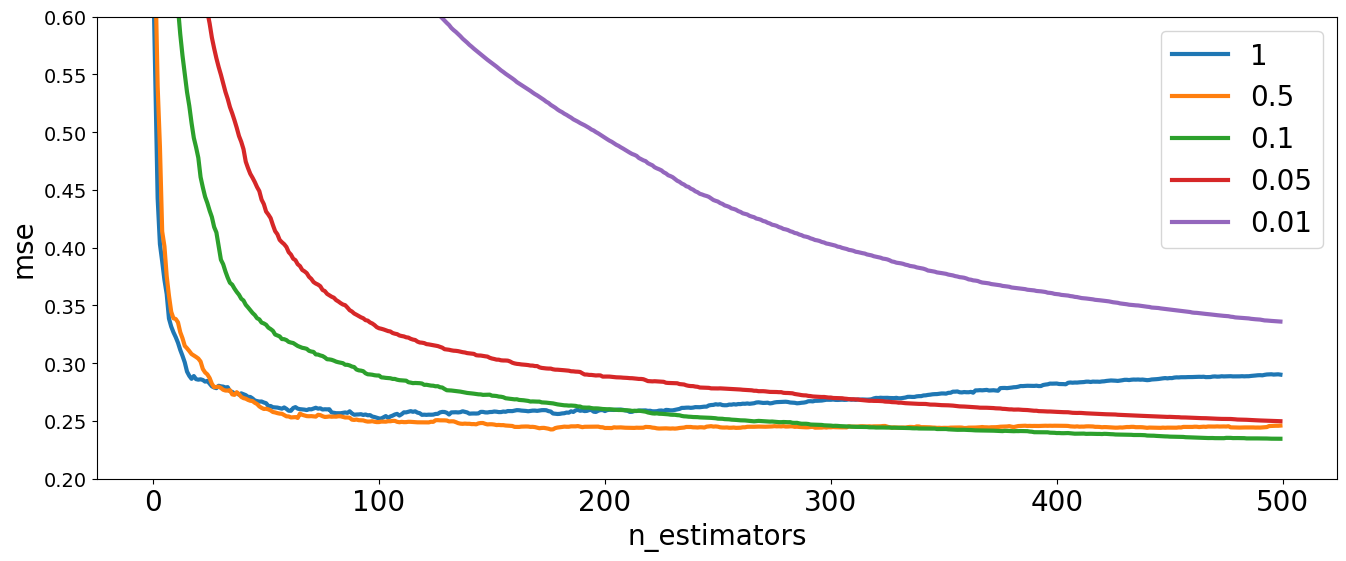

In [36]:
lr = []
step = []
mse = []
for gb_tree in gbtrees_list:
    for it, y_test_pred in enumerate(gb_tree.staged_predict(x_test)):
        erte = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
        mse.append(erte)
        lr.append(str(gb_tree.learning_rate))
        step.append(it)

df = pd.DataFrame({"learning_rate": lr, "n_estimators": step, "mse": mse})

plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x="n_estimators", y="mse", hue="learning_rate", lw=3)
plt.xlabel("n_estimators", size=20)
plt.ylabel("mse", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.ylim((0.2, 0.6))
plt.legend(fontsize=20)
plt.show()

В данном случае мы видим, что значение learning rate, установленное по умолчанию (`learning_rate=0.1`), позволяет получить наименьшую ошибку на валидации.
Слишком большие значения learning rate (1 и 0.5) приводят к тому, что мы не достигаем таких глубоких минимумов и начинаем переобучаться.
Слишком малое значение learning rate может привести к тому, что нам понадобится очень большое число деревьев, чтобы достигнуть минимума (если мы его вообще достигнем).

#### Число деревьев в ансамбле

Число деревьев, как было видно из предыдущего графика, зависит от установленного learning rate.
Поэтому обычно ставят `learning_rate = 0.1` и подбирают оптимальное значение числа деревьев в ансамбле.
Делают это на кросс-валидации, но для экономии времени просто дополнительно разобьем train датасет:

In [37]:
x_learn, x_valid, y_learn, y_valid = train_test_split(x_train, y_train, random_state=42)

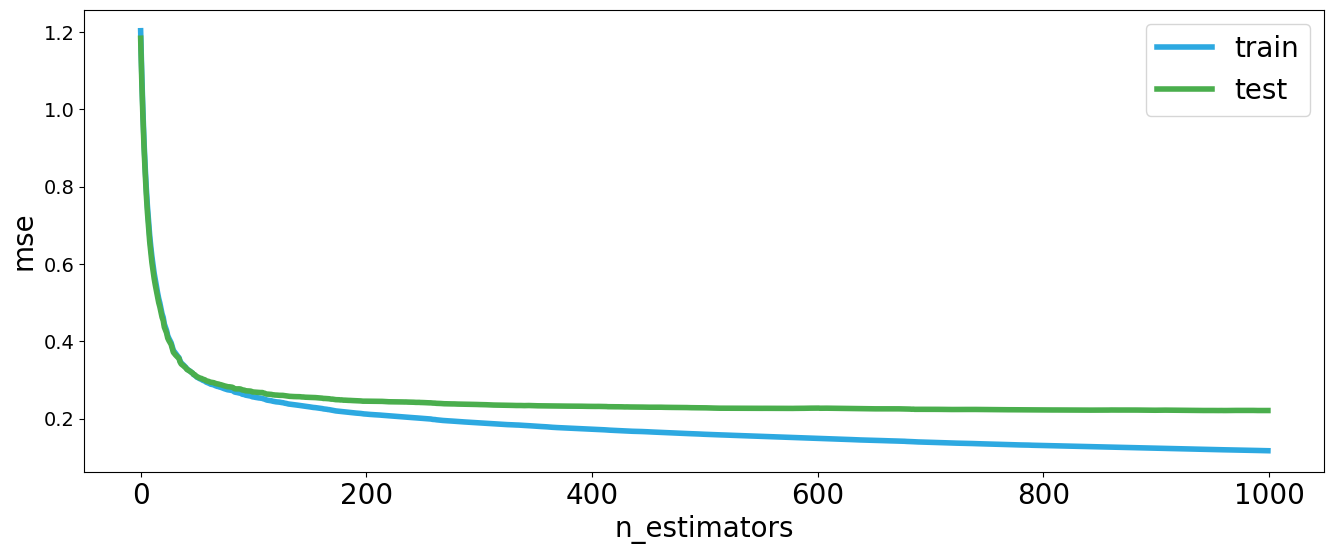

In [38]:
gbtree = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1)
gbtree.fit(x_learn, y_learn)

error_train = []
error_test = []
for it, (y_learn_pred, y_valid_pred) in enumerate(
    zip(gbtree.staged_predict(x_learn), gbtree.staged_predict(x_valid))
):
    ertr = mean_squared_error(y_true=y_learn, y_pred=y_learn_pred)
    error_train.append(ertr)
    erte = mean_squared_error(y_true=y_valid, y_pred=y_valid_pred)
    error_test.append(erte)

plt.figure(figsize=(16, 6))
plt.plot(error_train, label="train", c="#2DA9E1", linewidth=4)
plt.plot(error_test, label="test", c="#4AAE4D", linewidth=4)
plt.xlabel("n_estimators", size=20)
plt.ylabel("mse", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

Видим, что ошибка продолжает уменьшаться, но слишком медленно, потому в целях демонстрации выберем число деревьев равным 500.

#### Глубина деревьев в градиентном бустинге

В случае бустинга нам нужны **слабые модели**. Поэтому очень глубокие деревья в бустинге встречаются редко — бустинг с ними проигрывает по качеству.
Обычно глубина дерева выбирается вместе с минимальным числом объектов в листе `min_samples_leaf` или весом листа `min_weight_fraction_leaf`, так как эти параметры взаимосвязаны и вместе влияют на сложность полученных деревьев.
Здесь же в целях демонстрации мы подберем сначала глубину дерева, а потом минимальное число объектов.

In [39]:
models = {}
for depth in (1, 2, 3, 5, 10):
    models[depth] = GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.1, max_depth=depth, random_state=42
    )

depth_boost = train_and_test_regressor(models, x_learn, y_learn, x_valid, y_valid)

Fitted 1 with bootstrap score 0.336
Fitted 2 with bootstrap score 0.245
Fitted 3 with bootstrap score 0.229
Fitted 5 with bootstrap score 0.210
Fitted 10 with bootstrap score 0.233


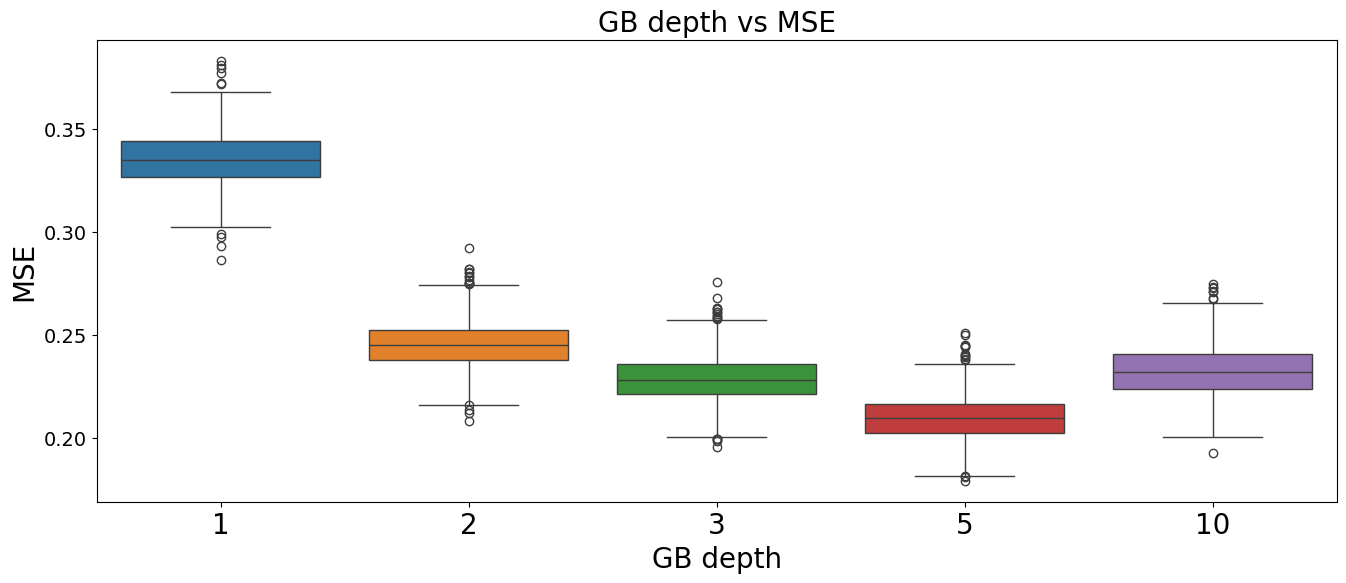

In [40]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=depth_boost)
plt.xlabel("GB depth", size=20)
plt.ylabel("MSE", size=20)
plt.title("GB depth vs MSE", size=20)
plt.tick_params(axis="both", which="major", labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.legend([], [], frameon=False)
plt.show()

Искомая глубина находится между 3 и 10. Добавим на график точки 4, 6 и 7.

In [41]:
models_add = {}
for depth in (4, 6, 7):
    models_add[depth] = GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.1, max_depth=depth, random_state=42
    )

depth_boost_add = train_and_test_regressor(
    models_add, x_learn, y_learn, x_valid, y_valid
)

Fitted 4 with bootstrap score 0.221
Fitted 6 with bootstrap score 0.214
Fitted 7 with bootstrap score 0.220


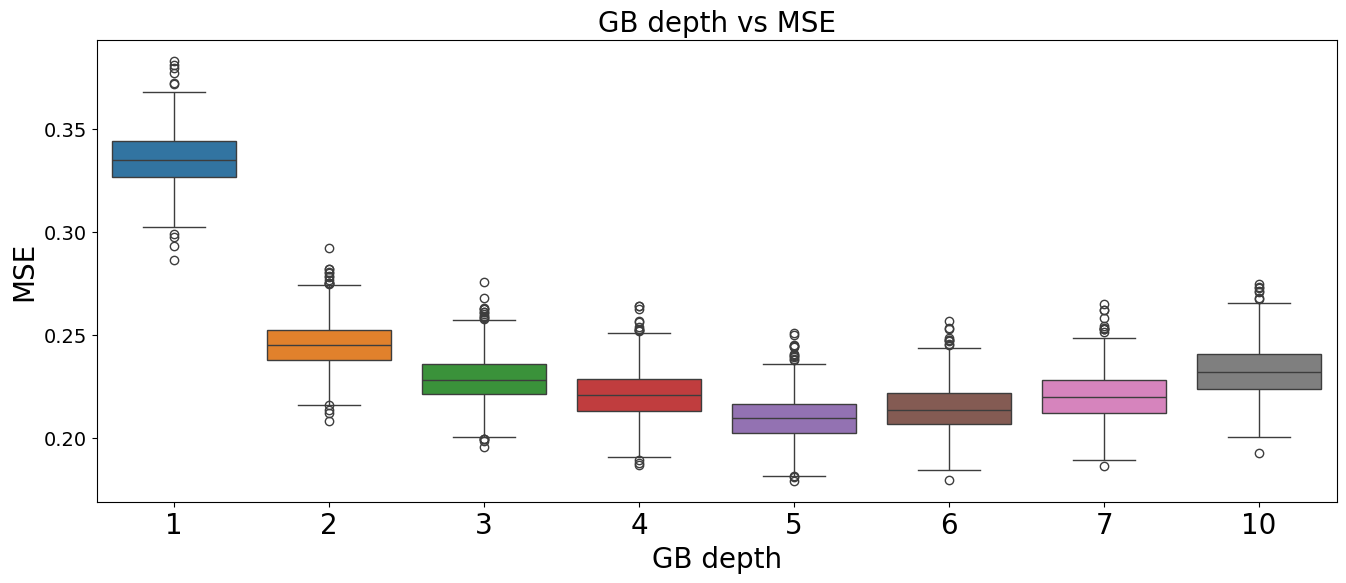

In [42]:
depth_boost_joined = pd.concat([depth_boost, depth_boost_add])

plt.figure(figsize=(16, 6))
sns.boxplot(data=depth_boost_joined)
plt.xlabel("GB depth", size=20)
plt.ylabel("MSE", size=20)
plt.title("GB depth vs MSE", size=20)
plt.tick_params(axis="both", which="major", labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.legend([], [], frameon=False)
plt.show()

Значит, оптимальная для данной задачи глубина — 5.

#### Минимальное число объектов в листе
Этот параметр влияет на сложность полученных деревьев. Как уже отмечалось ранее, стоит подбирать его вместе с глубиной, но мы ограничены по времени.

In [43]:
models = {}
for min_samples_leaf in (1, 3, 5, 7, 9, 11):
    models[min_samples_leaf] = GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.1,
        max_depth=5,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
    )

mns_boost = train_and_test_regressor(models, x_learn, y_learn, x_valid, y_valid)

Fitted 1 with bootstrap score 0.210
Fitted 3 with bootstrap score 0.210
Fitted 5 with bootstrap score 0.213
Fitted 7 with bootstrap score 0.211
Fitted 9 with bootstrap score 0.209
Fitted 11 with bootstrap score 0.212


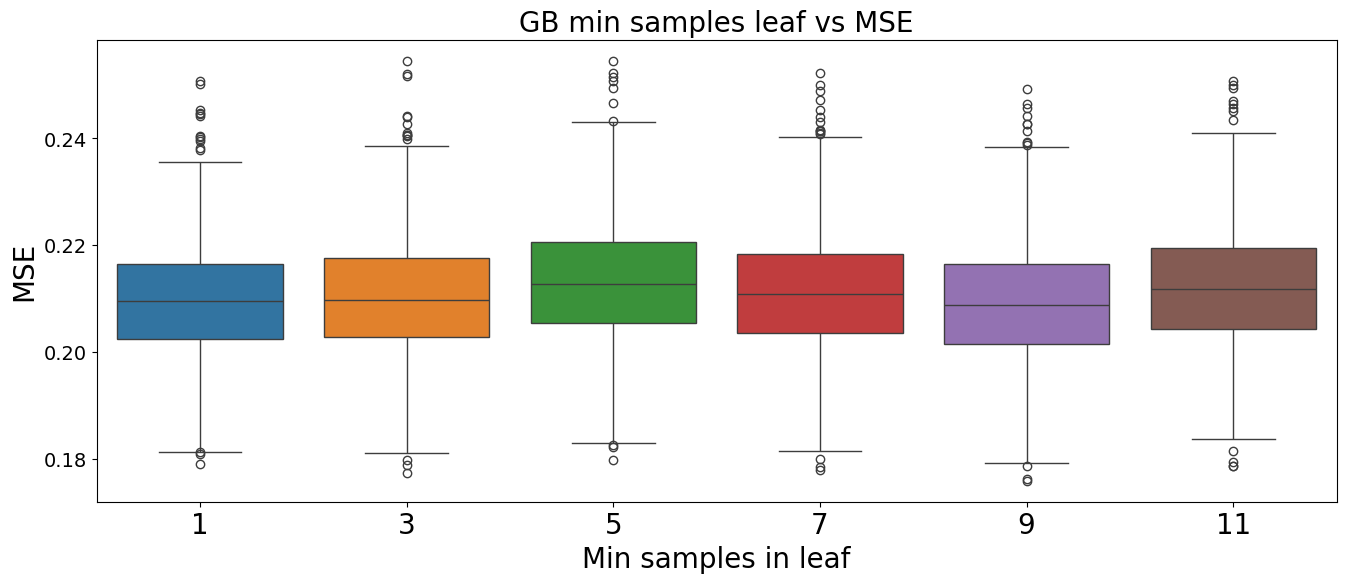

In [44]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=mns_boost)
plt.xlabel("Min samples in leaf", size=20)
plt.ylabel("MSE", size=20)
plt.title("GB min samples leaf vs MSE", size=20)
plt.tick_params(axis="both", which="major", labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.legend([], [], frameon=False)
plt.show()

Поставим число объектов в листе, равное 9.

#### Параметры `subsample` и `max_features`

Можно каждому дереву в ансамбле давать только часть объектов из выборки — получим стохастический градиентный бустинг. За это отвечает параметр `subsample`.

Аналогично можно давать каждому дереву в ансамбле лишь часть признаков — `max_features`.

Это может давать дополнительный прирост качества. Сейчас мы этот этап опускаем, так как у нас мало признаков и не очень много объектов, а также в целях экономии времени.

#### Понижение learning rate

После того, как мы подобрали остальные параметры, можно попытаться выиграть дополнительное качество за счет понижения `learning_rate` и одновременного увеличения числа деревьев в ансамбле.

Построим график качества для текущего `learning_rate` — мы же брали не оптимальное число предсказателей. Посмотрим, можно ли уже на финальном этапе взять побольше.

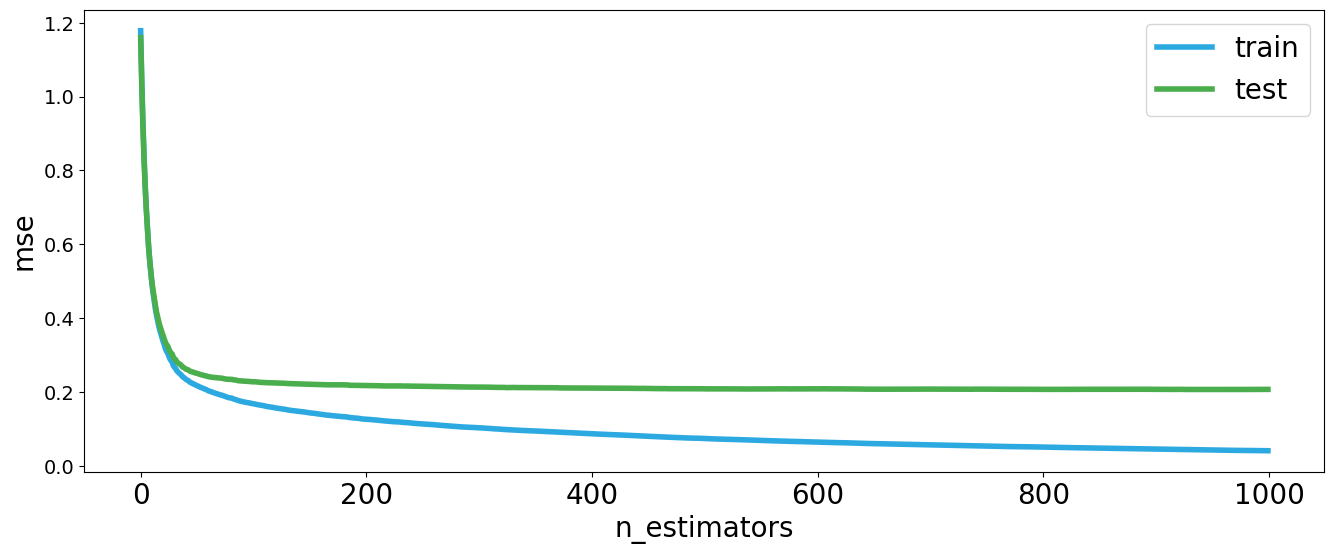

In [45]:
gbtree = GradientBoostingRegressor(
    n_estimators=1000,
    max_depth=5,
    min_samples_leaf=9,
    learning_rate=0.1,
    random_state=42,
)
gbtree.fit(x_learn, y_learn)

error_train = []
error_test = []
for it, (y_learn_pred, y_valid_pred) in enumerate(
    zip(gbtree.staged_predict(x_learn), gbtree.staged_predict(x_valid))
):
    ertr = mean_squared_error(y_true=y_learn, y_pred=y_learn_pred)
    error_train.append(ertr)
    erte = mean_squared_error(y_true=y_valid, y_pred=y_valid_pred)
    error_test.append(erte)

plt.figure(figsize=(16, 6))
plt.plot(error_train, label="train", c="#2DA9E1", linewidth=4)
plt.plot(error_test, label="test", c="#4AAE4D", linewidth=4)
plt.xlabel("n_estimators", size=20)
plt.ylabel("mse", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

Возьмем 500 деревьев.

In [46]:
models = {}

models["RF"] = RandomForestRegressor(
    n_estimators=250, max_depth=None, min_samples_leaf=1, n_jobs=-1, random_state=42
)

models["GBR"] = GradientBoostingRegressor(
    learning_rate=0.1, n_estimators=250, random_state=42
)

models["GBR tuned"] = GradientBoostingRegressor(
    learning_rate=0.1,
    n_estimators=500,
    max_depth=5,
    min_samples_leaf=9,
    random_state=42,
)

tuned_boost = train_and_test_regressor(models, x_train, y_train, x_test, y_test)

Fitted RF with bootstrap score 0.252
Fitted GBR with bootstrap score 0.252
Fitted GBR tuned with bootstrap score 0.204


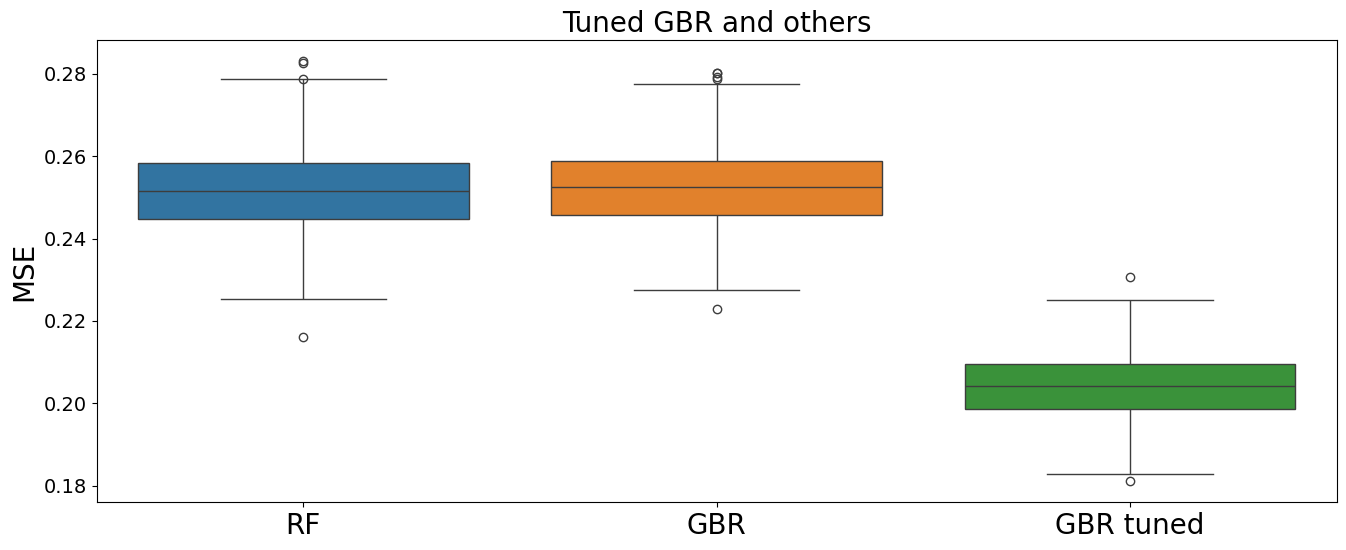

In [47]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=tuned_boost)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Tuned GBR and others", size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

Видим, что мы дополнительно уменьшили ошибку

## Модификации градиентного бустинга

Есть много модификаций градиентного бустинга. В отличие от реализации в `sklearn`, большая часть из них умеет параллелиться на CPU или даже на GPU.

Поэтому при работе с реальными данными использовать градиентный бустинг из `sklearn` не стоит. Другие реализации бустинга дадут результат лучше и быстрее.

### XGBoost

[[doc] 🛠️ Официальная документация](https://xgboost.readthedocs.io/en/stable/)

Одной из ключевых идей реализации является оптимизация траектории градиентного спуска. Полезно будет спускаться медленно и чтобы модели по пути не были сложными, достаточно минимального отличия от случайной модели.

Для этого XGBoost вводит специальный штраф за сложные деревья (большей глубины, чем 2–3). За счет того, что в градиентном бустинге можно минимизировать любую дифференцируемую функцию ошибок, мы просто добавляем штраф напрямую в функцию ошибок исходного градиентного бустинга.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/xgboost.png" width="1000"></center>

Скопируем параметры, которые совпадают в градиентном бустинге и XGBoost. Посмотрим, получится ли еще улучшить качество.

In [49]:
import xgboost

models_add = {}
models_add["XGB"] = xgboost.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    min_child_weight=9,  # not exact analogue for min_samples_leaf
    n_jobs=-1,  # can be constructed in parrallel, much!!! faster)
    objective="reg:squarederror",
)

xgb_add = train_and_test_regressor(models_add, x_train, y_train, x_test, y_test)

Fitted XGB with bootstrap score 0.201


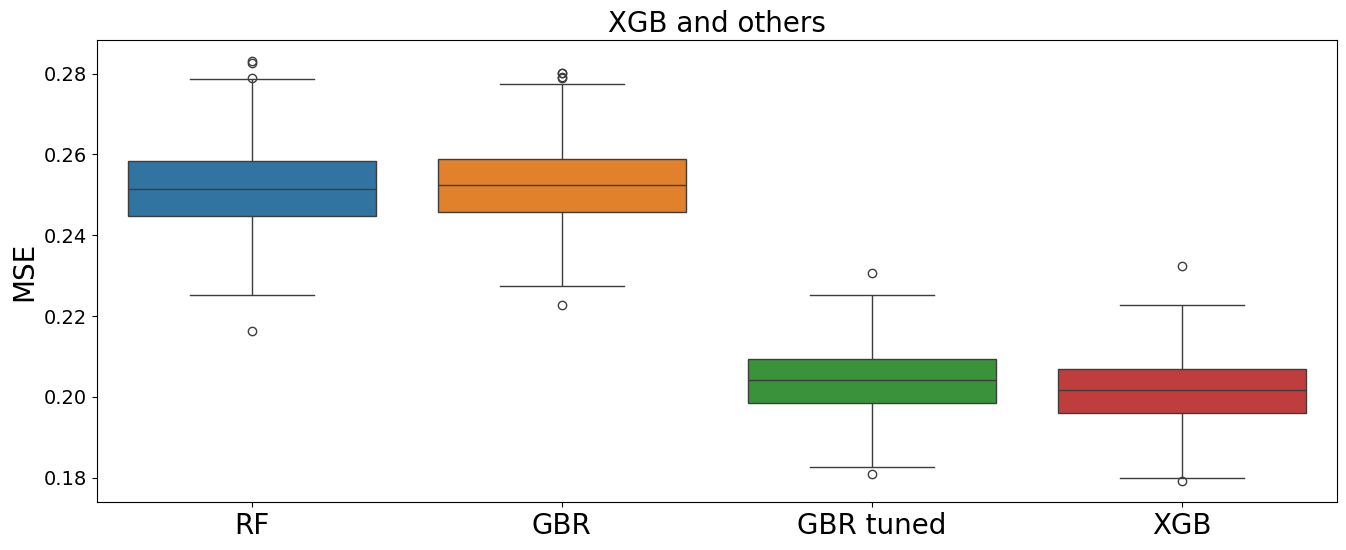

In [50]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=pd.concat([tuned_boost, xgb_add]))
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("XGB and others", size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

Пусть и незначительно, но XGBoost лучше GBR. И, главное, в разы быстрее.

Также XGBoost немного иначе определяет важность листа: не сколько именно объектов попало в лист, а каково отличие предсказаний на разных объектах в листе. Из-за этого способа параметр `min_child_weight` может принимать нецелые значения, в том числе меньше 1 (к примеру, в случае задачи классификации).

Попробуем подобрать только этот параметр. Заметьте, мы можем спокойно использовать 2000 деревьев, не боясь ждать результата расчетов долгое время.

In [51]:
models = {}
for min_child_weight in (1, 2, 3, 5, 7, 9, 11, 13, 15):
    models[f"{min_child_weight}"] = xgboost.XGBRegressor(
        n_estimators=2000,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        min_child_weight=min_child_weight,
        n_jobs=-1,
        objective="reg:squarederror",
    )

xgb_mw = train_and_test_regressor(models, x_train, y_train, x_test, y_test)

Fitted 1 with bootstrap score 0.200
Fitted 2 with bootstrap score 0.202
Fitted 3 with bootstrap score 0.201
Fitted 5 with bootstrap score 0.197
Fitted 7 with bootstrap score 0.197
Fitted 9 with bootstrap score 0.198
Fitted 11 with bootstrap score 0.199
Fitted 13 with bootstrap score 0.195
Fitted 15 with bootstrap score 0.197


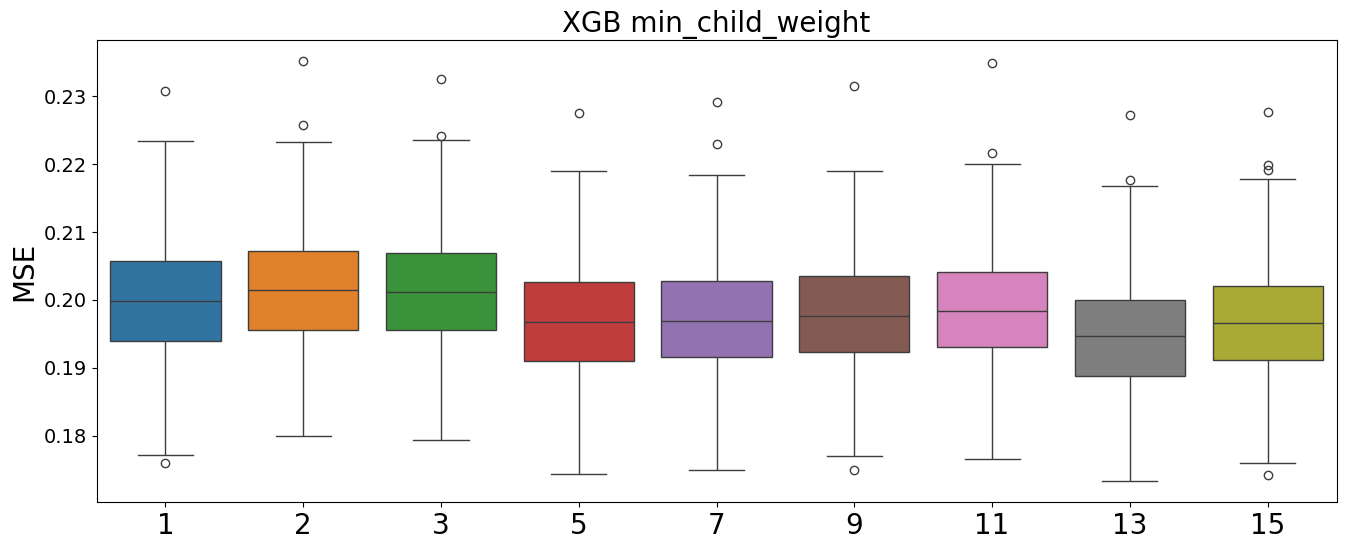

In [52]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=xgb_mw)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("XGB min_child_weight", size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

Возьмем 13:



In [53]:
models_add2 = {}
models_add2["XGB tuned"] = xgboost.XGBRegressor(
    n_estimators=2000,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    min_child_weight=13,
    n_jobs=-1,
    objective="reg:squarederror",
)

xgb_add2 = train_and_test_regressor(models_add2, x_train, y_train, x_test, y_test)

Fitted XGB tuned with bootstrap score 0.195


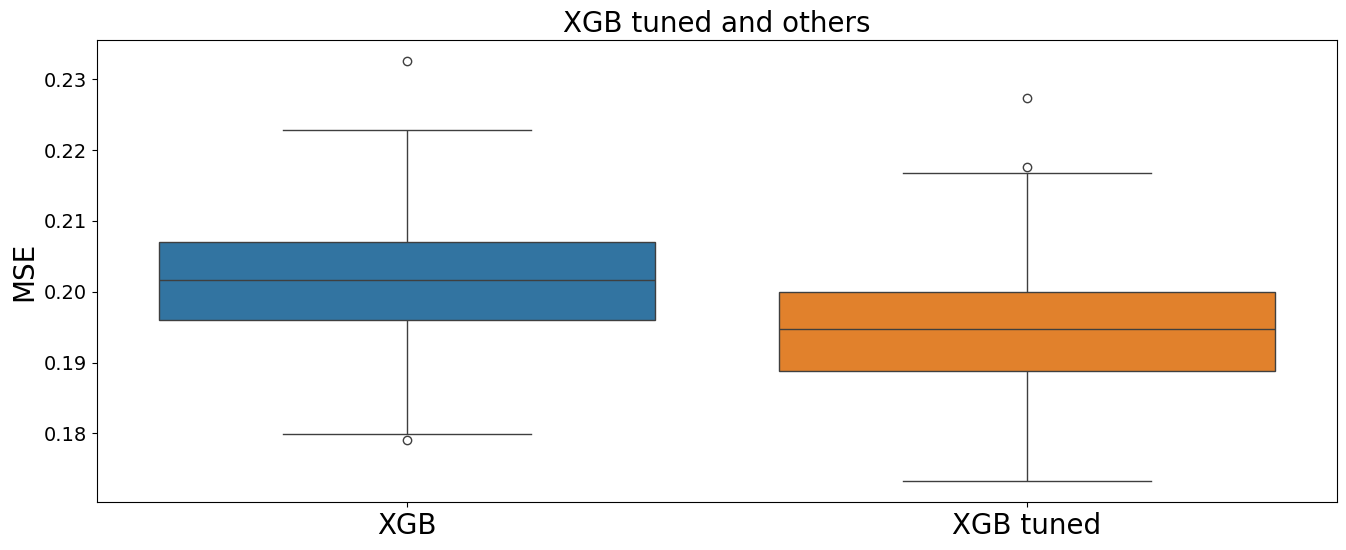

In [54]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=pd.concat([xgb_add, xgb_add2]))
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("XGB tuned and others", size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

Стало немного лучше.

### LightGBM

[[doc] 🛠️ Официальная документация](https://lightgbm.readthedocs.io/en/stable/)

LightGBM изначально содержит различные оптимизации, ускоряющие его работу. Кроме этого, LightGBM по умолчанию строит дерево немного иначе, нежели XGBoost.

XGBoost по умолчанию строит дерево по уровням — на каждом уровне происходит разбиение узлов, если это приводит к уменьшению ошибки. Ограничены мы только максимальной глубиной дерева.

LightGBM же строит дерево по узлам. На каждом шаге разбивается тот узел, разбиение которого сильнее всего минимизирует функцию ошибки, ограничения на глубину нет. В LightGBM вводится ограничение не на глубину дерева, а на общее число листьев в итоговом дереве.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L03/out/lightgbm.png" width="900"></center>

По умолчанию он еще быстрее (хотя в XGBoost тоже есть опции для ускорения).

Из-за особенностей построения им деревьев надо задавать не высоту дерева, а максимальное число листьев. Поставим пока так, чтобы число листьев было равно числу листьев в дереве высоты 6.

In [55]:
!pip install -q dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 6.5 MB/s eta 0:00:00


In [56]:
import lightgbm

models_add3 = {}
models_add3["LGBM"] = lightgbm.LGBMRegressor(
    n_estimators=2000,  # can use more estimators due to SPEEEEEED
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=2**5,
    random_state=42,
    min_child_weight=13,
    n_jobs=-1,
    force_col_wise=True,
    verbose=-1,
)

lgb_add = train_and_test_regressor(models_add3, x_train, y_train, x_test, y_test)

Fitted LGBM with bootstrap score 0.193


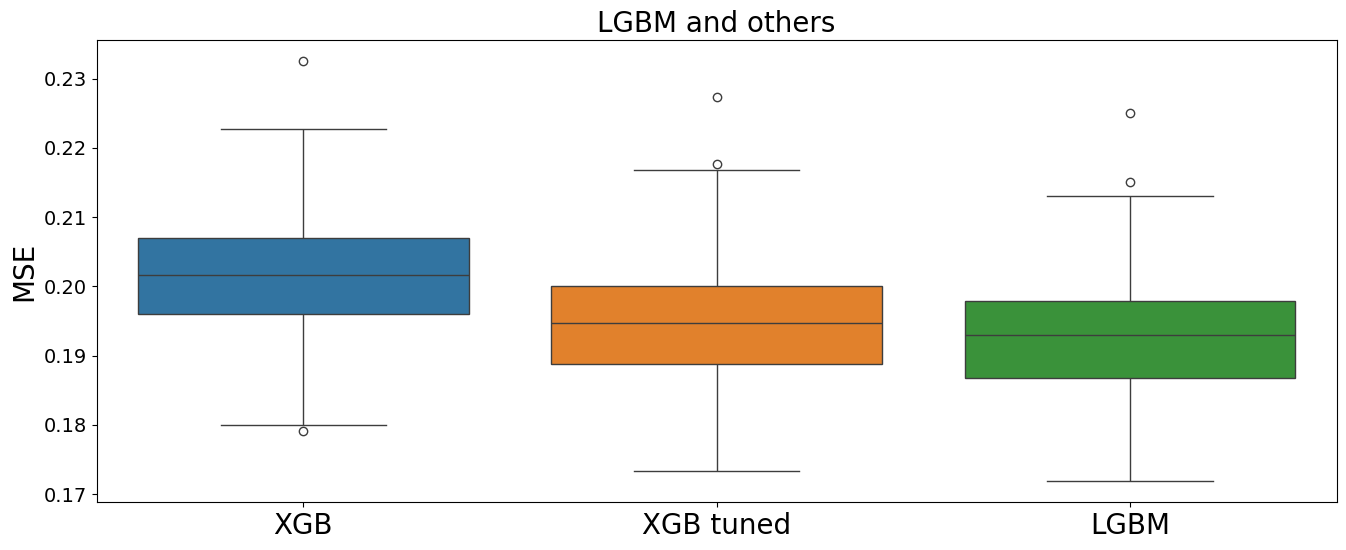

In [57]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=pd.concat([xgb_add, xgb_add2, lgb_add]))

plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("LGBM and others", size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

На текущих данных лучше чем XGBoost, но важно понимать, что это не всегда так.


Отдельно подберем ограничение на число листьев. По словам создателей, оно не должно быть больше числа листьев в соответствующем дереве глубины 5, то есть 32.

In [58]:
models = {}
for num_leaves in (8, 16, 24, 32, 40):
    models[f"{num_leaves}"] = lightgbm.LGBMRegressor(
        n_estimators=2000,
        learning_rate=0.1,
        max_depth=-1,
        num_leaves=num_leaves,
        random_state=42,
        min_child_weight=13,
        n_jobs=-1,
        force_col_wise=True,
        verbose=-1,
    )

lgb_nl = train_and_test_regressor(models, x_learn, y_learn, x_valid, y_valid)

Fitted 8 with bootstrap score 0.205
Fitted 16 with bootstrap score 0.208
Fitted 24 with bootstrap score 0.207
Fitted 32 with bootstrap score 0.206
Fitted 40 with bootstrap score 0.209


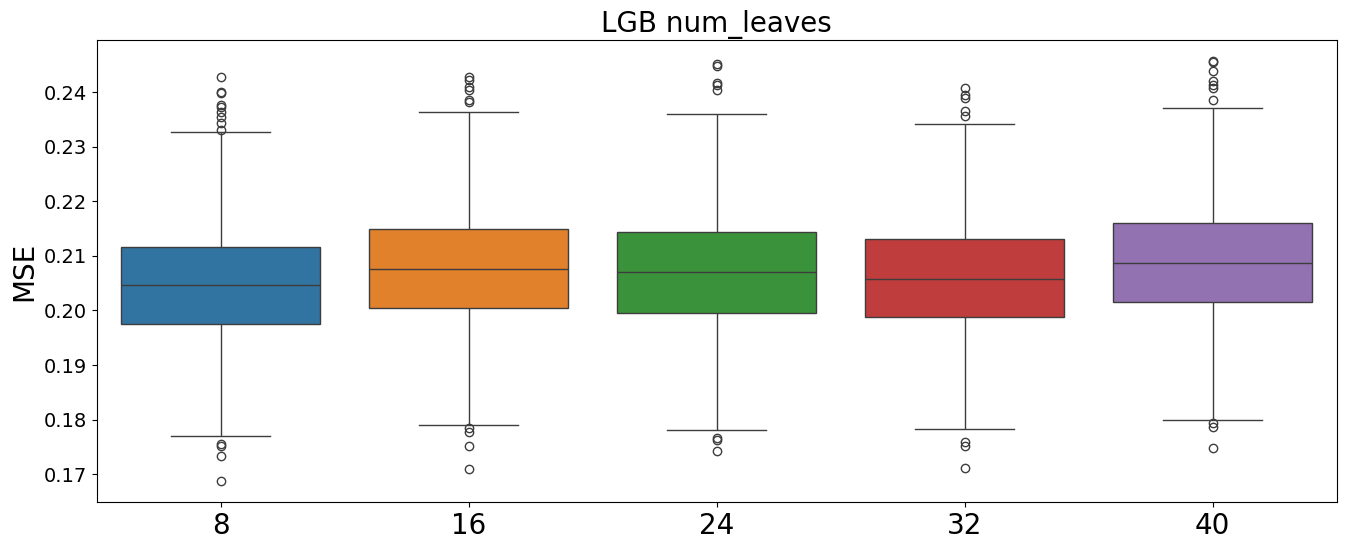

In [59]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=lgb_nl)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("LGB num_leaves", size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

Из этого графика можно сделать вывод, что оптимальное число листьев находится в районе 8.

In [60]:
models = {}
for num_leaves in (8, 12, 16, 20):
    models[f"{num_leaves}"] = lightgbm.LGBMRegressor(
        n_estimators=2000,
        learning_rate=0.1,
        max_depth=-1,
        num_leaves=num_leaves,
        random_state=42,
        min_child_weight=13,
        n_jobs=-1,
        force_col_wise=True,
        verbose=-1,
    )

lgb_nl = train_and_test_regressor(models, x_learn, y_learn, x_valid, y_valid)

Fitted 8 with bootstrap score 0.205
Fitted 12 with bootstrap score 0.205
Fitted 16 with bootstrap score 0.208
Fitted 20 with bootstrap score 0.203


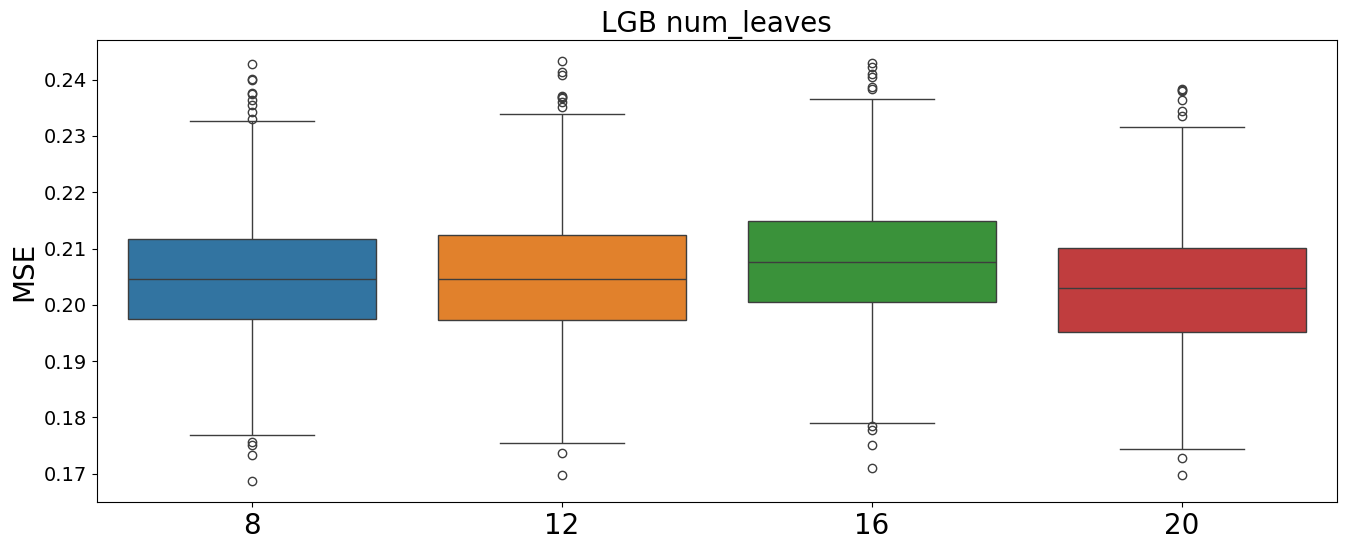

In [61]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=lgb_nl)
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("LGB num_leaves", size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

Выберем 12 листьев:

In [62]:
models_add4 = {}
models_add4["LGBM tuned"] = lightgbm.LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=12,
    random_state=42,
    min_child_weight=13,
    n_jobs=-1,
    force_col_wise=True,
    verbose=-1,
)

lgb_add2 = train_and_test_regressor(models_add4, x_train, y_train, x_test, y_test)

Fitted LGBM tuned with bootstrap score 0.194


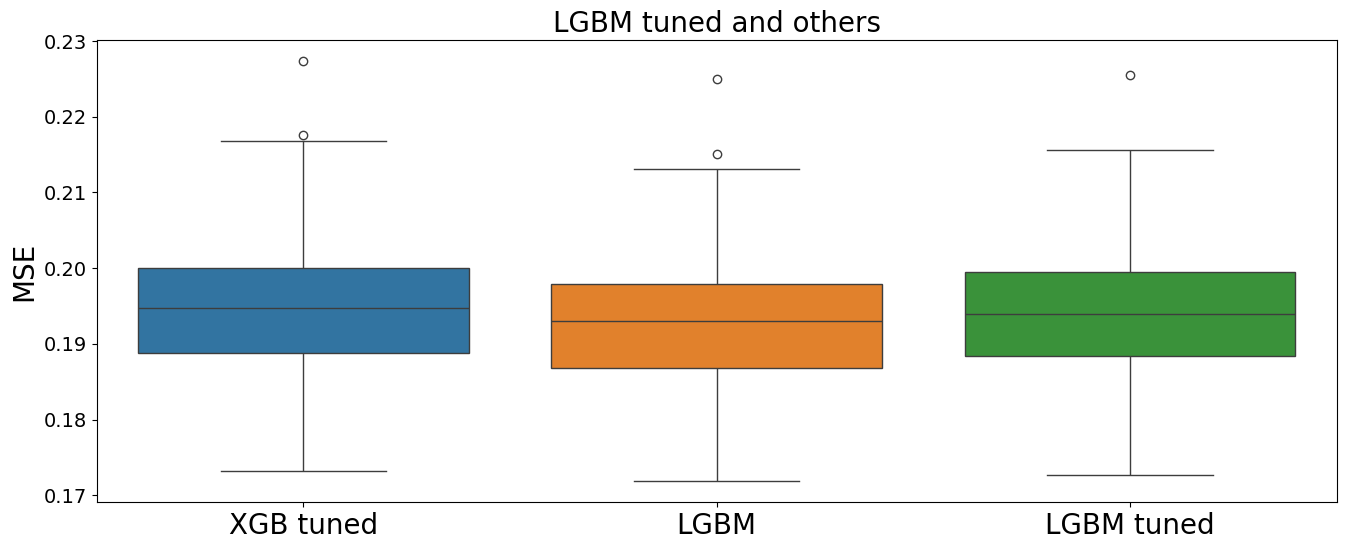

In [63]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=pd.concat([xgb_add2, lgb_add, lgb_add2]))
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("LGBM tuned and others", size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

Стало чуть хуже.

### CatBoost

[[doc] 🛠️ Официальная документация](https://catboost.ai/en/docs/)

Разработан Яндексом.

1. Хорошо умеет работать с категориальными признаками. Если у вас много категориальных признаков, он может дать существенный выигрыш.
2. Умеет работать с текстом без предварительной обработки. Достаточно указать, что колонка содержит текстовый признак.
3. По умолчанию использует в качестве модели модификацию обычного дерева решения — Symmetric Tree, которое менее склонно к переобучению.

In [64]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [65]:
import catboost

models_add4 = {}
models_add4["CatBoost"] = catboost.CatBoostRegressor(
    iterations=2000,
    learning_rate=0.1,
    random_state=42,
    verbose=0,
)
# task_type="GPU") # can use gpu, but no parallel-cpu option

cat_add = train_and_test_regressor(models_add4, x_train, y_train, x_test, y_test)

Fitted CatBoost with bootstrap score 0.188


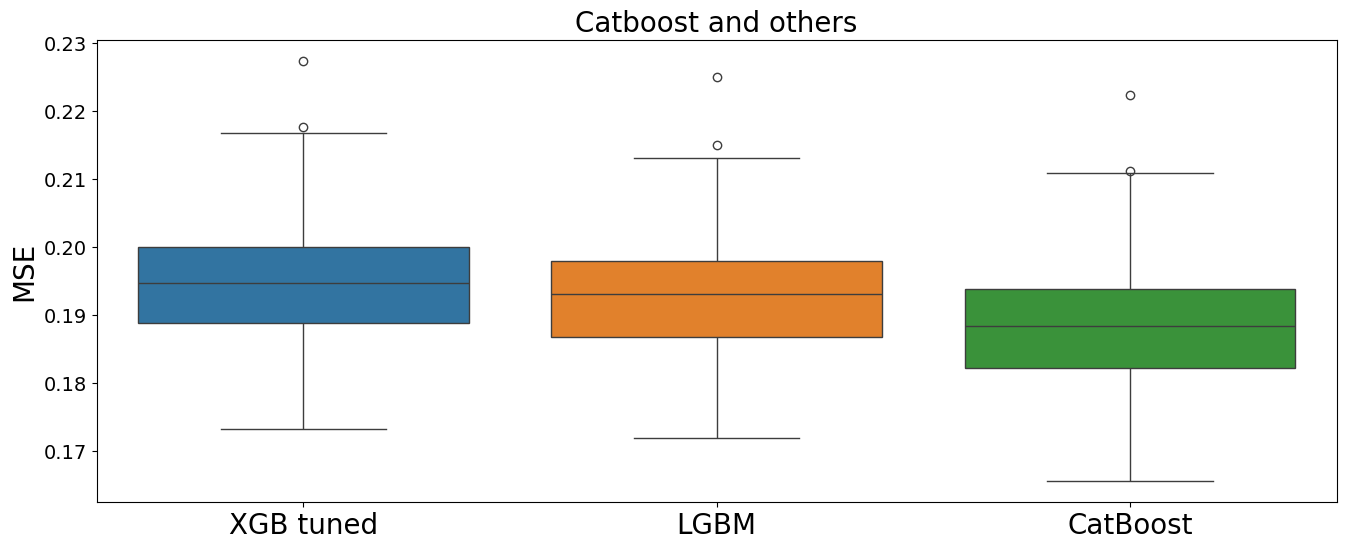

In [66]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=pd.concat([xgb_add2, lgb_add, cat_add]))
plt.xlabel("", size=20)
plt.ylabel("MSE", size=20)
plt.title("Catboost and others", size=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=20)
plt.show()

Стало  лучше.

### Подбор параметров модифицированных бустингов

Каждый из модифицированных бустингов имеет свои особые параметры и рекомендации от создателей и участников Kaggle, как и в каком порядке выбирать параметры. Если вы решили использовать тот или иной вид бустинга в своей задаче, ознакомтесь c этими советами.

Все три бустинга, к примеру, позволяют задавать не только число признаков, использующихся в каждом узле, но и число признаков, использующихся в каждом дереве в целом.

Кроме того, все три бустинга имеют настройки, ускоряющие их работу (у LightGBM эти настройки выставлены по умолчанию), и все три бустинга умеют работать на GPU.

Здесь мы бегло пробежались по самым верхам, копируя подобранные на предыдущих этапах параметры.